<a href="https://colab.research.google.com/github/ymaydias/Tech_challenge3/blob/main/3%C2%BA_Tech_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
!pip install google-cloud-bigquery
from google.cloud import bigquery

In [71]:
from google.colab import auth
auth.authenticate_user()

In [72]:
from google.cloud import bigquery
from google.colab import data_table
import bigframes.pandas as bpd

project = 'vaulted-zodiac-435822-n8'
location = 'US'
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()

In [73]:
job = client.get_job('bquxjob_6de68e1f_19245b374a2')
print(job.query)

SELECT
ano,
mes,
sigla_uf,
a002 AS idade,
CASE
WHEN CAST(a003 AS STRING) = '1' THEN 'homem'
WHEN CAST(a003 AS STRING) = '2' THEN 'mulher'
ELSE 'Não especificado'
END AS sexo,
CASE
WHEN CAST(a005 AS STRING) = '1' THEN 'Sem instrução'
WHEN CAST(a005 AS STRING) = '2' THEN 'Fundamental incompleto'
WHEN CAST(a005 AS STRING) = '3' THEN 'Fundamental completa'
WHEN CAST(a005 AS STRING) = '4' THEN 'Médio incompleto'
WHEN CAST(a005 AS STRING) = '5' THEN 'Médio completo'
WHEN CAST(a005 AS STRING) = '6' THEN 'Superior incompleto'
WHEN CAST(a005 AS STRING) = '7' THEN 'Superior completo'
WHEN CAST(a005 AS STRING) = '8' THEN 'Pós-graduação, mestrado ou doutorado'
ELSE 'Não especificado'
END AS escolaridade,
CASE
WHEN CAST(b0014 AS STRING) = '1' THEN 'Sim'
WHEN CAST(b0014 AS STRING) = '2' THEN 'Não'
WHEN CAST(b0014 AS STRING) = '3' THEN 'Não sabe'
ELSE 'Não especificado'
END AS dificuldade_respiracao,
CASE
WHEN CAST(b00110 AS STRING) = '1' THEN 'Sim'
WHEN CAST(b00110 AS STRING) = '2' THEN 'Não'
WHEN C

In [74]:
job = client.get_job('bquxjob_6de68e1f_19245b374a2')
df = job.to_dataframe()
df.head()

,ano,mes,sigla_uf,idade,sexo,escolaridade,dificuldade_respiracao,dor_olhos,perda_oufato_paladar,tosse,...,este_domicilio_e,renda,aula_presencial,buscou_ajuda_medica,restringiu_contato_com_pessoas,home_office,morador,resultado_covid_cotonete,resultado_covid_sangue_furo_dedo,resultado_covid_sangue_veia_braco
0,2020,5,AP,16,homem,Médio incompleto,Não,Não,Não,Não,...,Próprio - já pago,NaN,Não aplicável,Não aplicável,Não especificado,Não aplicável,2,Não aplicável,Não aplicável,Não aplicável
1,2020,5,AP,39,mulher,Médio completo,Não,Não,Não,Não,...,Próprio - já pago,1000.0,Não aplicável,Não aplicável,Não especificado,Não aplicável,2,Não aplicável,Não aplicável,Não aplicável
2,2020,5,AP,34,homem,Médio completo,Não,Não,Não,Não,...,Alugado,1200.0,Não aplicável,Não aplicável,Não especificado,Não aplicável,2,Não aplicável,Não aplicável,Não aplicável
3,2020,5,AP,14,mulher,Fundamental incompleto,Não,Não,Não,Não,...,Próprio - já pago,NaN,Não aplicável,Não aplicável,Não especificado,Não aplicável,1,Não aplicável,Não aplicável,Não aplicável
4,2020,5,AP,24,mulher,Médio incompleto,Não,Não,Não,Não,...,Próprio - já pago,NaN,Não aplicável,Não aplicável,Não especificado,Não aplicável,1,Não aplicável,Não aplicável,Não aplicável


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114742 entries, 0 to 1114741
Data columns (total 21 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   ano                                1114742 non-null  Int64  
 1   mes                                1114742 non-null  Int64  
 2   sigla_uf                           1114742 non-null  object 
 3   idade                              1114742 non-null  object 
 4   sexo                               1114742 non-null  object 
 5   escolaridade                       1114742 non-null  object 
 6   dificuldade_respiracao             1114742 non-null  object 
 7   dor_olhos                          1114742 non-null  object 
 8   perda_oufato_paladar               1114742 non-null  object 
 9   tosse                              1114742 non-null  object 
 10  empregado                          1114742 non-null  object 
 11  este_domicilio_e        

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df['data'] = pd.to_datetime(df['ano'].astype(str) + '-' + df['mes'].astype(str), format='%Y-%m')

In [78]:
df = df.drop(columns=['ano', 'mes'])

In [79]:
dificuldade_respiracao_sim_soma = (df['dificuldade_respiracao'] == 'Sim').sum()
dificuldade_respiracao_sim_soma

11858

In [80]:
dor_olhos_sim_soma = (df['dor_olhos'] == 'Sim').sum()
dor_olhos_sim_soma

11206

In [81]:
perda_oufato_paladar_sim_soma = (df['perda_oufato_paladar'] == 'Sim').sum()
perda_oufato_paladar_sim_soma

13946

In [82]:
tosse_sim_soma = (df['tosse'] == 'Sim').sum()
tosse_sim_soma

29554

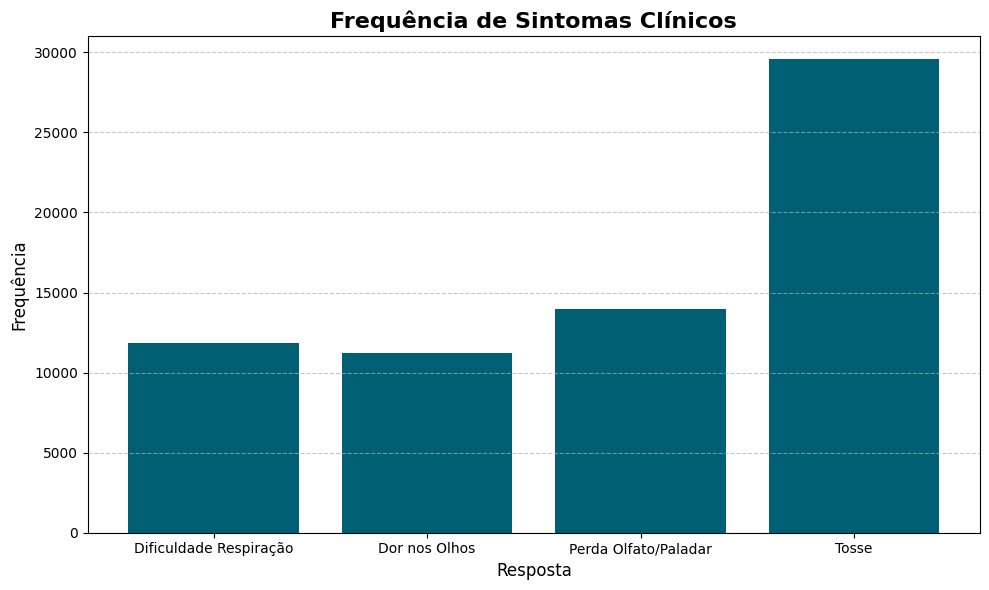

In [83]:
import matplotlib.ticker as ticker

dificuldade_respiracao_sim_soma = (df['dificuldade_respiracao'] == 'Sim').sum()
dor_olhos_sim = (df['dor_olhos'] == 'Sim').sum()
perda_oufato_paladar_sim = (df['perda_oufato_paladar'] == 'Sim').sum()
tosse_sim = (df['tosse'] == 'Sim').sum()

quadros_clinicos = ['Dificuldade Respiração', 'Dor nos Olhos', 'Perda Olfato/Paladar', 'Tosse']
frequencias_sim_soma = [dificuldade_respiracao_sim_soma, dor_olhos_sim_soma, perda_oufato_paladar_sim_soma, tosse_sim_soma]

plt.figure(figsize=(10,6))
plt.bar(quadros_clinicos, frequencias_sim_soma, color='#005f73')

plt.title('Frequência de Sintomas Clínicos', fontsize=16, weight='bold')
plt.ylabel('Frequência', fontsize=12)
plt.xlabel('Quadro Clínico', fontsize=12)

plt.ylabel('Frequência', fontsize=12)
plt.xlabel('Resposta', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-84-2bfe083dcd7e>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_filtered = df[['idade', 'tosse', 'dificuldade_respiracao', 'dor_olhos', 'perda_oufato_paladar']].applymap(lambda x: 1 if x == 'Sim' else 0)
<ipython-input-84-2bfe083dcd7e>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_faixa = df_filtered.groupby('faixa_etaria').sum()


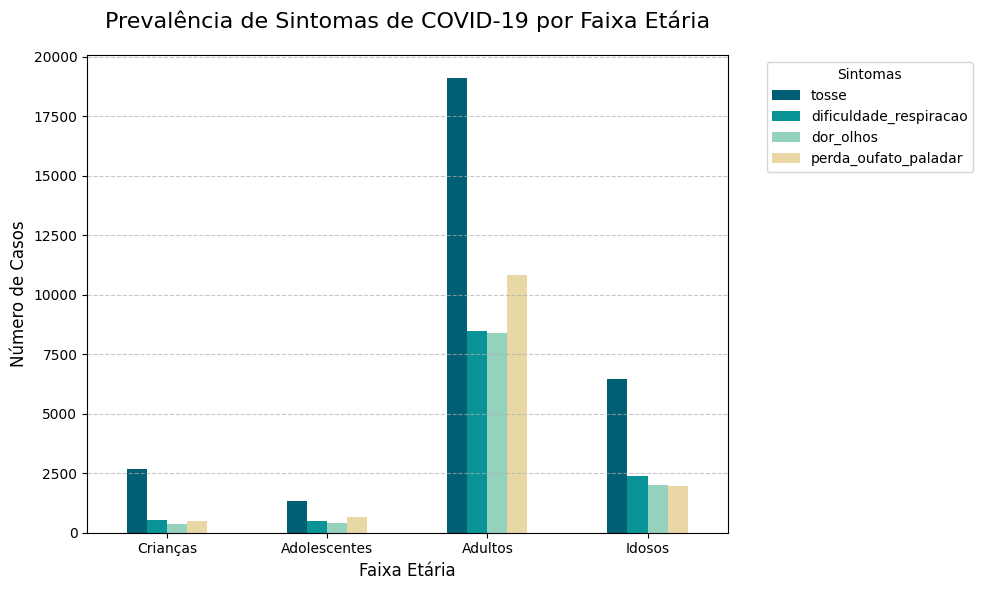

In [84]:
df_filtered = df[['idade', 'tosse', 'dificuldade_respiracao', 'dor_olhos', 'perda_oufato_paladar']].applymap(lambda x: 1 if x == 'Sim' else 0)
df['idade'] = pd.to_numeric(df['idade'], errors='coerce')
df_filtered['idade'] = df['idade']
df_filtered = df_filtered.dropna(subset=['idade'])
bins = [0, 12, 17, 59, np.inf]
labels = ['Crianças', 'Adolescentes', 'Adultos', 'Idosos']

df_filtered['faixa_etaria'] = pd.cut(df_filtered['idade'], bins=bins, labels=labels, right=False)
df_faixa = df_filtered.groupby('faixa_etaria').sum()

sintomas = ['tosse', 'dificuldade_respiracao', 'dor_olhos', 'perda_oufato_paladar']

cores_azuis = ['#005f73', '#0a9396', '#94d2bd', '#e9d8a6']
df_faixa[sintomas].plot(kind='bar', color=cores_azuis, figsize=(10, 6))
plt.title('Prevalência de Sintomas de COVID-19 por Faixa Etária', fontsize=16, pad=20)
plt.ylabel('Número de Casos', fontsize=12)
plt.xlabel('Faixa Etária', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Sintomas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [85]:
df_faixa.sum()

,0
idade,40892743
tosse,29554
dificuldade_respiracao,11858
dor_olhos,11206
perda_oufato_paladar,13946


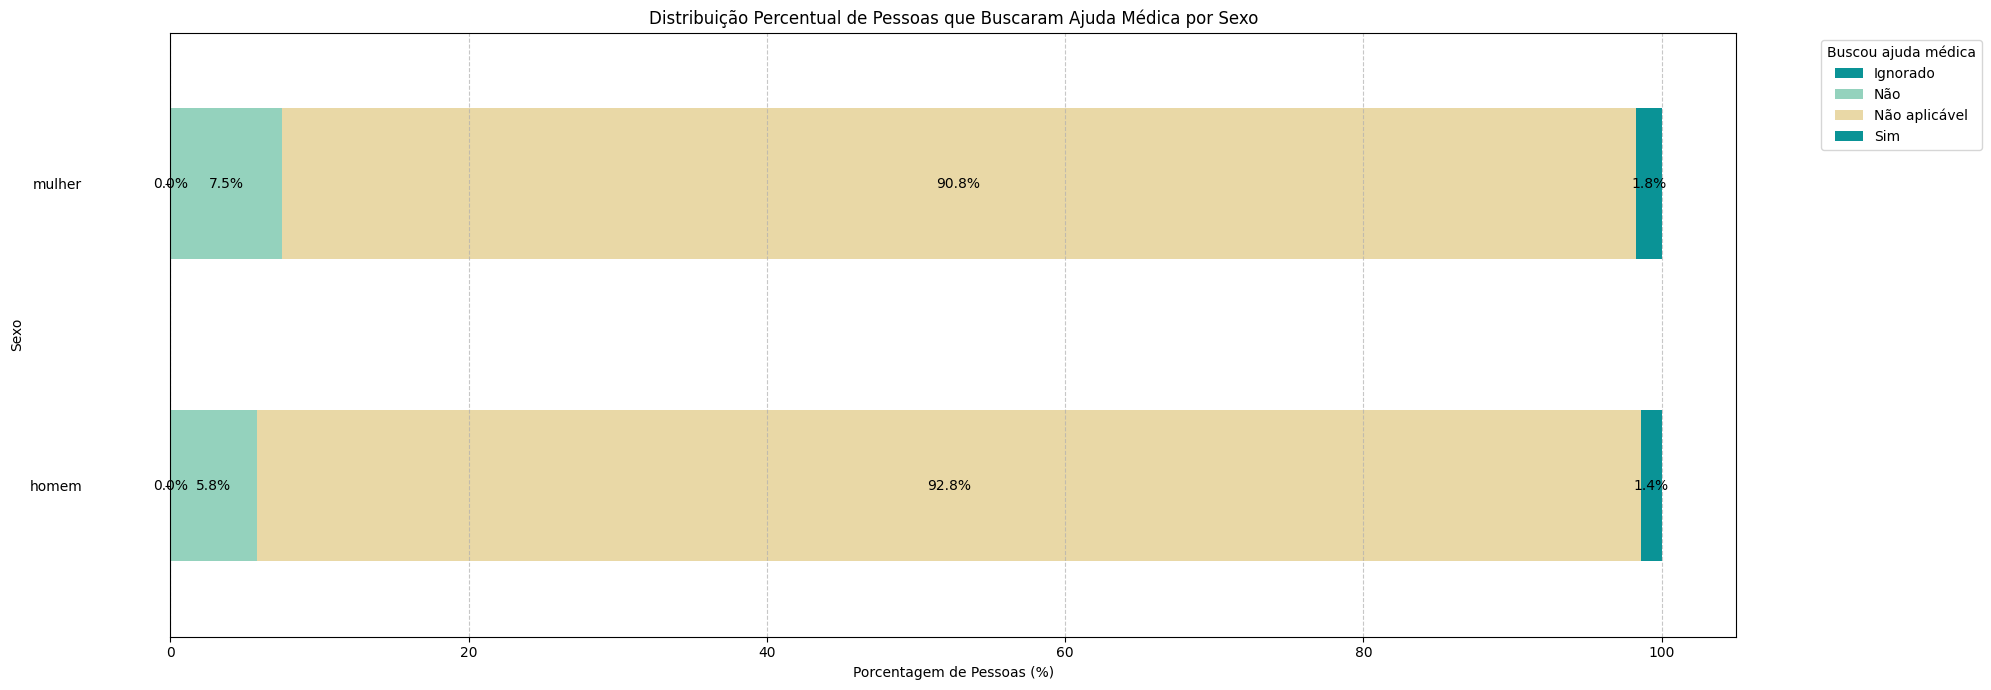

In [86]:
contagem_busca_ajuda = df.groupby(['sexo', 'buscou_ajuda_medica']).size().unstack(fill_value=0)

porcentagem_busca_ajuda = contagem_busca_ajuda.div(contagem_busca_ajuda.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(20, 7))

porcentagem_busca_ajuda.plot(kind='barh', stacked=True, color=['#0a9396', '#94d2bd', '#e9d8a6'], ax=ax)

ax.set_title('Distribuição Percentual de Pessoas que Buscaram Ajuda Médica por Sexo')
ax.set_xlabel('Porcentagem de Pessoas (%)')
ax.set_ylabel('Sexo')
ax.grid(axis='x', linestyle='--', alpha=0.7)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', position=(-0.05,0))
ax.legend(title='Buscou ajuda médica', bbox_to_anchor=(1.05, 1), loc='upper left')
for i in ax.patches:
    ax.annotate(f'{i.get_width():.1f}%', (i.get_x() + i.get_width() / 2, i.get_y() + i.get_height() / 2),
                 ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

<ipython-input-95-6816e3eea24f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sintoma', y='Total', data=df_sintomas, palette=cores_azuis)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wi

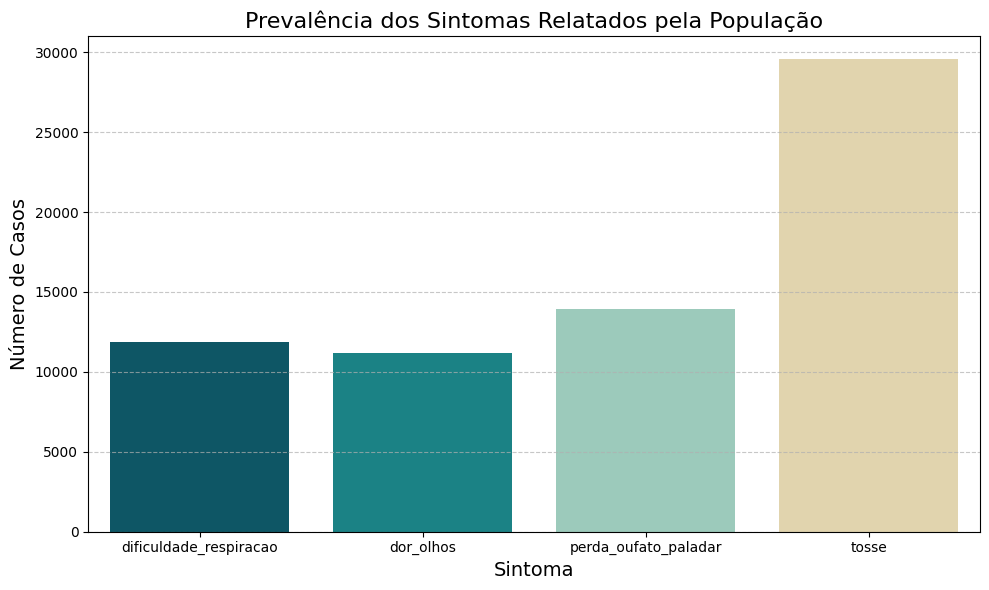

In [95]:
sintomas = ['dificuldade_respiracao', 'dor_olhos', 'perda_oufato_paladar', 'tosse']
df_sintomas = df[sintomas].apply(lambda x: (x == 'Sim').sum()).reset_index()
df_sintomas.columns = ['Sintoma', 'Total']

cores_azuis = ['#005f73', '#0a9396', '#94d2bd', '#e9d8a6']

plt.figure(figsize=(10, 6))
sns.barplot(x='Sintoma', y='Total', data=df_sintomas, palette=cores_azuis)
plt.title('Prevalência dos Sintomas Relatados pela População', fontsize=16)
plt.xlabel('Sintoma', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

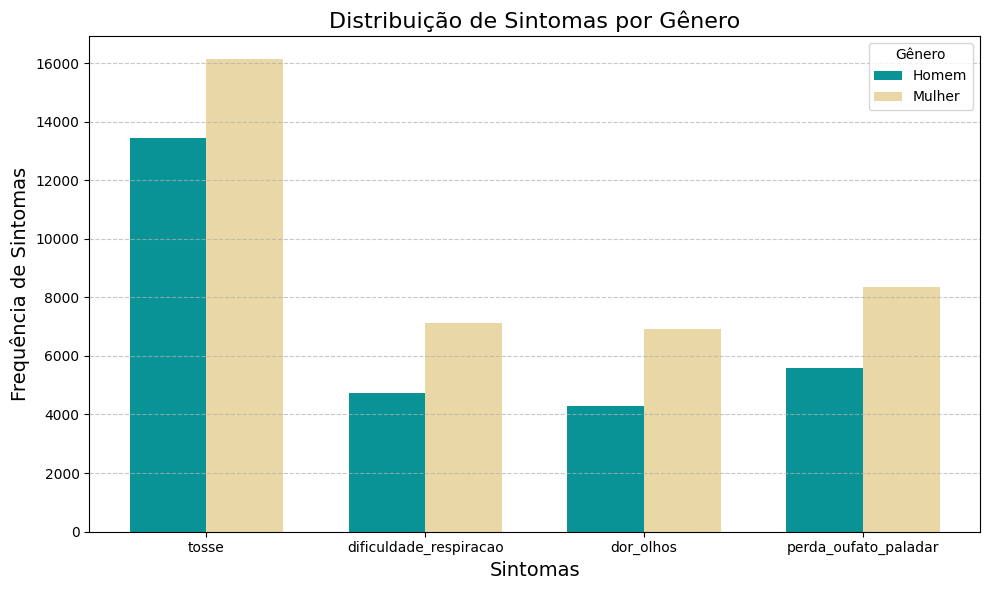

In [96]:
cores_genero = ['#0a9396', '#e9d8a6']

sintomas_por_genero = df.groupby('sexo')[['tosse', 'dificuldade_respiracao', 'dor_olhos', 'perda_oufato_paladar']].apply(lambda x: (x == 'Sim').sum())

sintomas = ['tosse', 'dificuldade_respiracao', 'dor_olhos', 'perda_oufato_paladar']
indice = np.arange(len(sintomas))
largura = 0.35

plt.figure(figsize=(10, 6))
plt.bar(indice - largura/2, sintomas_por_genero.loc['homem'], largura, label='Homem', color=cores_genero[0])
plt.bar(indice + largura/2, sintomas_por_genero.loc['mulher'], largura, label='Mulher', color=cores_genero[1])

plt.xticks(indice, sintomas, rotation=0, ha='center')
plt.xlabel('Sintomas', fontsize=14)
plt.ylabel('Frequência de Sintomas', fontsize=14)
plt.title('Distribuição de Sintomas por Gênero', fontsize=16)

plt.legend(title='Gênero')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<ipython-input-97-caabe141faf4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Home Office', y='Total', data=df_home_office, palette=cores_azuis)
<ipython-input-97-caabe141faf4>:7: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x='Home Office', y='Total', data=df_home_office, palette=cores_azuis)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a futu

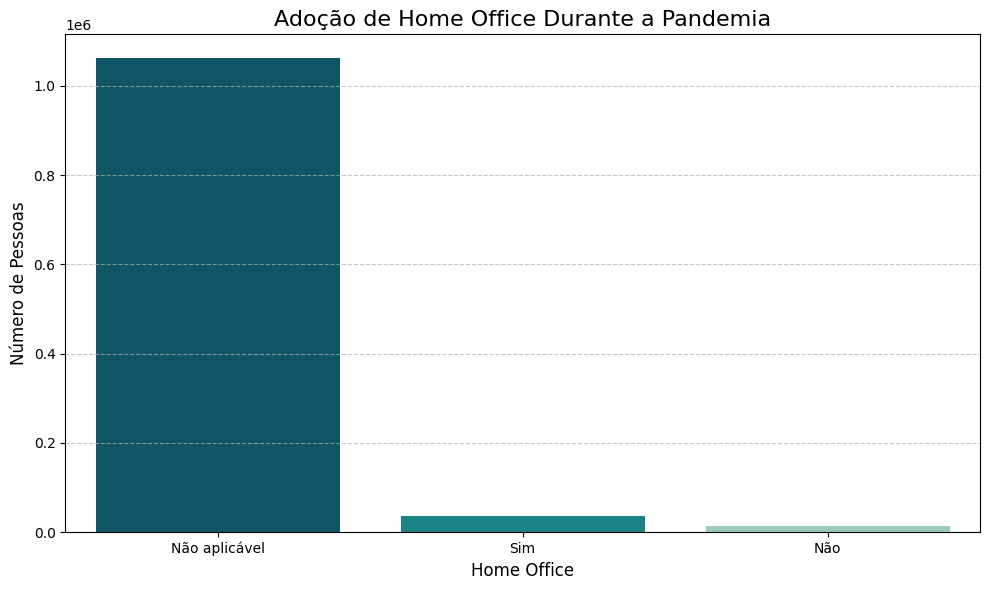

In [97]:
df_home_office = df['home_office'].value_counts().reset_index()
df_home_office.columns = ['Home Office', 'Total']

cores_azuis = ['#005f73', '#0a9396', '#94d2bd', '#e9d8a6']

plt.figure(figsize=(10, 6))
sns.barplot(x='Home Office', y='Total', data=df_home_office, palette=cores_azuis)
plt.title('Adoção de Home Office Durante a Pandemia', fontsize=16)
plt.xlabel('Home Office', fontsize=12)
plt.ylabel('Número de Pessoas', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<ipython-input-99-410e873de767>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sigla_uf', y='renda', data=renda_por_estado, palette=cores_azuis)
<ipython-input-99-410e873de767>:6: UserWarning: 
The palette list has fewer values (4) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='sigla_uf', y='renda', data=renda_por_estado, palette=cores_azuis)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a lengt

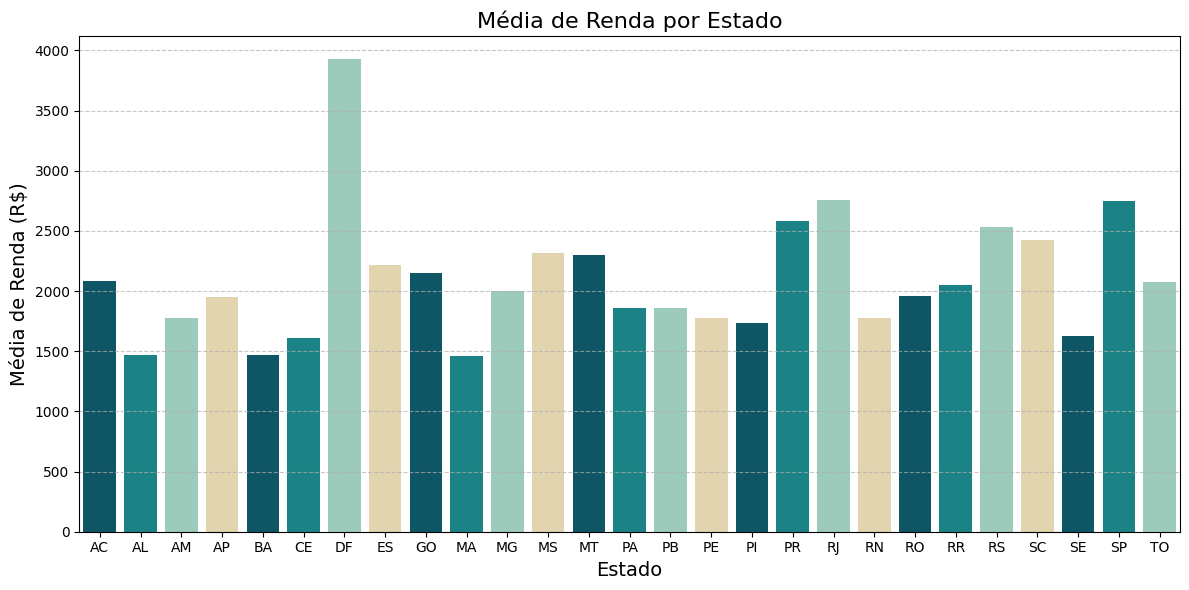

In [99]:
plt.figure(figsize=(12, 6))

cores_azuis = ['#005f73', '#0a9396', '#94d2bd', '#e9d8a6']

renda_por_estado = df.groupby('sigla_uf')['renda'].mean().reset_index()
sns.barplot(x='sigla_uf', y='renda', data=renda_por_estado, palette=cores_azuis)

plt.title('Média de Renda por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Média de Renda (R$)', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

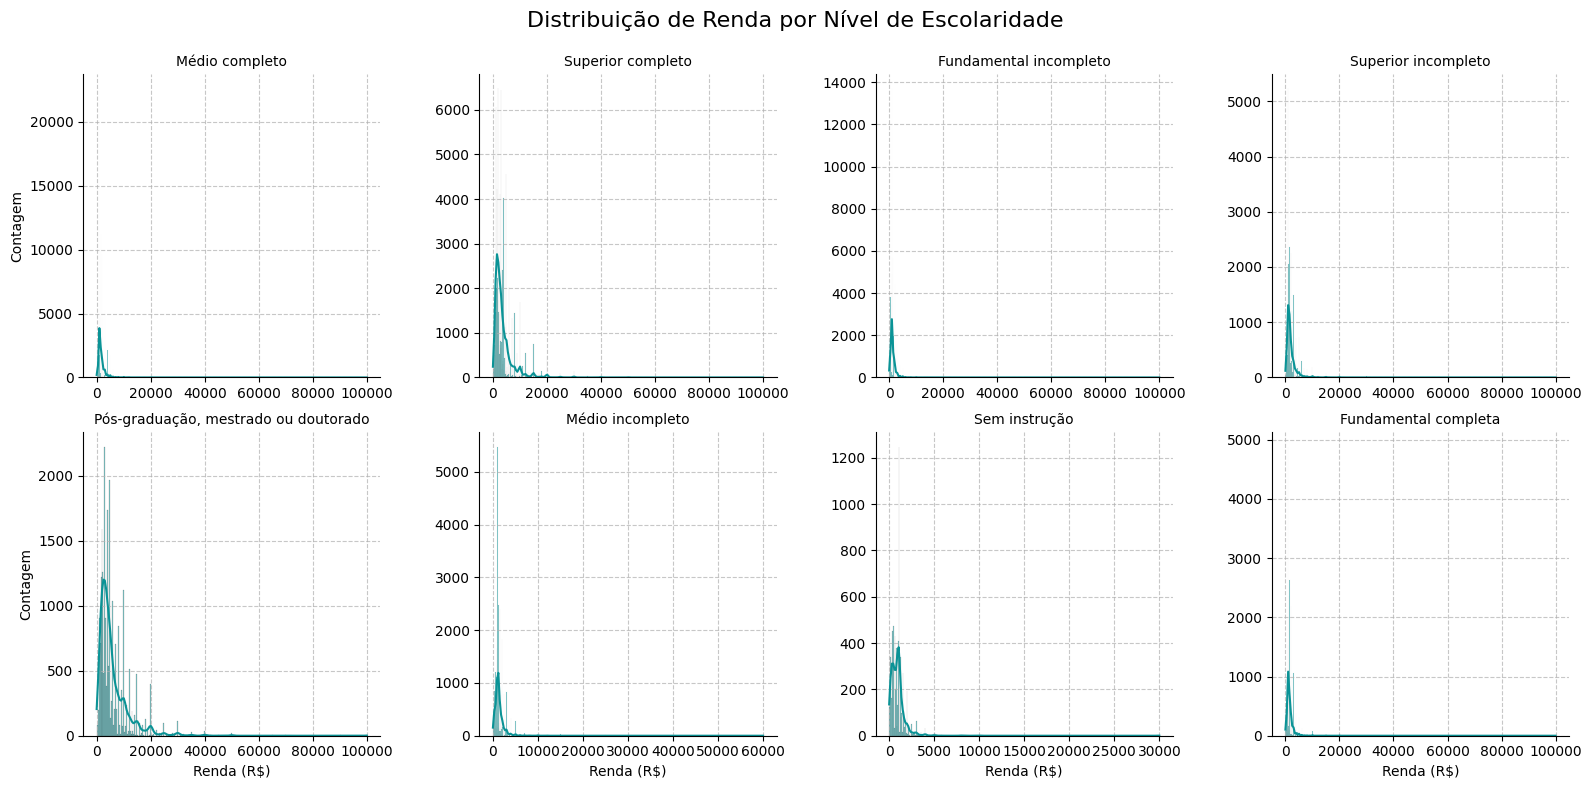

In [100]:
cores_teal = ['#005f73', '#0a9396']

df_clean = df[df['renda'] <= 100000]

g = sns.FacetGrid(df_clean, col='escolaridade', col_wrap=4, height=4, sharex=False, sharey=False)

g.map(sns.histplot, 'renda', kde=True, color=cores_teal[1])

g.set_axis_labels("Renda (R$)", "Contagem")
g.set_titles("{col_name}")

# Ativar grid em todos os subplots
for ax in g.axes.flat:
    ax.grid(True, linestyle='--', alpha=0.7)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribuição de Renda por Nível de Escolaridade', fontsize=16)

plt.show()